#FactSet Fundamentals - Data Reference: https://www.quantopian.com/help/factset_fundamentals

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.factset import Fundamentals
from quantopian.pipeline.factors import SimpleBeta, Returns

import quantopian.research as qr

In [2]:
# Latest market cap value.
mcap = Fundamentals.mkt_val.latest

# Latest annual sales value.
annual_sales = Fundamentals.sales_af.latest

# 2-week returns (used for a plot below).
returns = Returns(window_length=10)

In [6]:
columns = {
    'annual_sales': annual_sales,
    'log_annual_sales': annual_sales.log(),
    'mcap_decile': mcap.deciles(),
    'mcap': mcap,
    'mcap_asof': Fundamentals.mkt_val_asof_date.latest,
    'returns': returns,
}

pipe = Pipeline(
    columns,
    screen=(returns.percentile_between(1, 99) & mcap.notnull()),
)#, screen=(excess_return.notnull()))# & beta.notnull()))

result = qr.run_pipeline(pipe, '2016-01-15', '2017-02-25')
result.head()

annual_sales  log_annual_sales  \
2016-01-15 00:00:00+00:00 Equity(2 [ARNC])   2.388200e+10         23.896391   
                          Equity(21 [AAME])  1.650350e+08         18.921668   
                          Equity(24 [AAPL])  2.312830e+11         26.166908   
                          Equity(31 [ABAX])  2.025930e+08         19.126710   
                          Equity(39 [DDC])   9.157530e+08         20.635257   

                                                     mcap  mcap_asof  \
2016-01-15 00:00:00+00:00 Equity(2 [ARNC])   1.265580e+10 2015-09-30   
                          Equity(21 [AAME])  8.308800e+07 2015-09-30   
                          Equity(24 [AAPL])  6.399390e+11 2015-09-30   
                          Equity(31 [ABAX])  9.993210e+08 2015-09-30   
                          Equity(39 [DDC])   9.010980e+08 2015-10-31   

                                             mcap_decile   returns  
2016-01-15 00:00:00+00:00 Equity(2 [ARNC])             9 -0.265720  
                          Equity(21 [AAME])            1 -0.115230  
                          Equity(24 [AAPL])            9 -0.054262  
                          Equity(31 [ABAX])            5 -0.093913  
                          Equity(39 [DDC])             5  0.001955

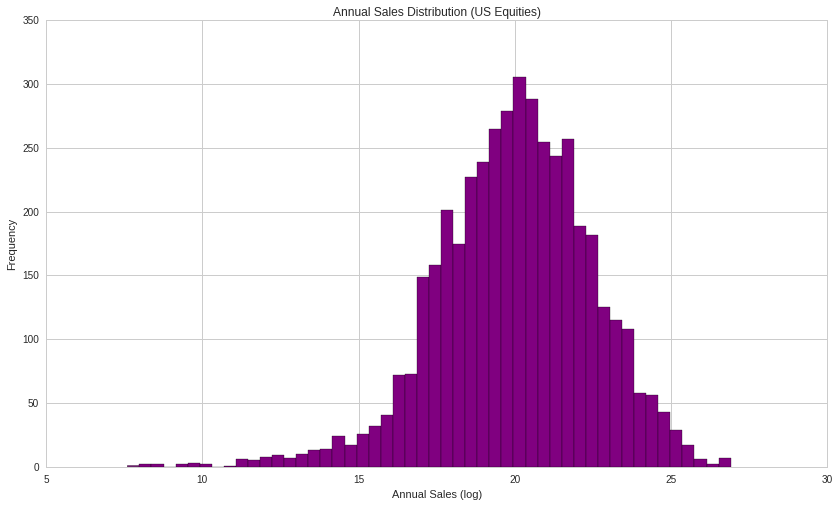

In [7]:
import numpy as np
sales_data = result.loc[('2016-02-08', slice(None)), :]['log_annual_sales']
sales_data = sales_data.replace([np.inf, -np.inf], np.nan)
sales_data = sales_data.dropna()
ax = sales_data.plot(
    kind='hist', 
    title='Annual Sales Distribution (US Equities)', 
    x='log_annual_sales', 
    bins=50, 
    color='purple'
);
ax.set_xlabel('Annual Sales (log)');

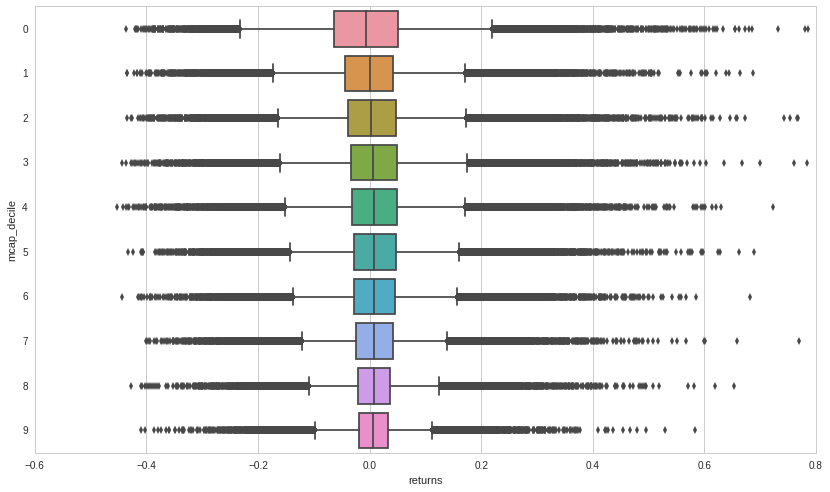

In [8]:
import seaborn as sns
ax = sns.boxplot(x='returns', y='mcap_decile', data=result, orient='h')